<a href="https://colab.research.google.com/github/Petrarco/aviation_case/blob/main/Teste_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Import Libraries

In [ ]:
!pip install delta-spark==3.3.0
!pip install pyspark==3.5.3
!pip install gdown -q
#!pip install databricks-connect

In [ ]:
#Import all packages
import os
import zipfile
import pyspark
from pyspark.sql import SparkSession
from delta import *
from google.colab import drive
from pyspark.sql.types import *
from pyspark.sql.functions import *
#Mount Your Drive
#drive.mount('/content/drive', force_remount=True)

#Download Files

In [ ]:
#Download arquivos
def download_file(file_id, destination, file_name):

  #create folder
  os.mkdir(destination)
  # Use gdown to download the file

  file_name = 'airplane_data.zip'
  output_path = f'{destination}/{file_name}'

  print(f"Baixando arquivo com gdown (ID: {file_id})")
  !gdown --id {file_id} -O {output_path}

  print(f"Download concluído. Verificando o tipo do arquivo: {output_path}")
  !file {output_path}


#Unzip File
def unzip_file(zip_file_path, extract_to_path):
  try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_to_path}'")
  except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid ZIP file.")
  except FileNotFoundError:
    print(f"Error: ZIP file '{zip_file_path}' not found.")


file_id = '1vvpkxrk7CRmOMnpEKYvoT8JccydQbW0x'
destination = 'data'
file_name = 'airplane_data.zip'
file_path = f'{destination}/{file_name}'

download_file(file_id, 'data', 'airplane_data.zip')
unzip_file(file_path, destination)

Configuração do ambiente para rodar pyspark

In [ ]:

#Connect Spark Context
builder = SparkSession.builder.appName("MyApp") \
    .config("spark.sql.catalogImplementation","hive")\
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")\
    .config("spark.jars.packages", "io.delta:delta-core_2.12:2.4.0")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

spark

###Databases
Crie dois databases sendo um para camada bronze e outro para a camada silver.

O Nome dos Databases são:

*   Bronze (b_nvr)
*   Silver (s_nvr)




In [ ]:
#Criar Database Bronze

In [ ]:
#Criar Database Silver

In [ ]:
spark.sql('show databases').show()

#Carga Bronze

Após a criação do database bronze estar concluido, carregue os arquivos da folder air_plane_data e crie uma tabela delta para cada path de arquivo, igual a imagem.

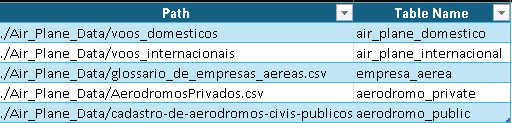

Crie um processo de carga para as tabelas:
1. air_plane_domestico e air_plane_internacional que pegue todos os arquivos disponíveis na pasta
  * Crei um campo chamado cd_peri que contenha os campos ano e mês concatenados ou pegue do nome da folder.
  * Como as tabelas não existem elas precisam ser criadas durante o processamento.
  * As tabelas precisam estar particionadas, e a escolha da partição fica a seu critério.Por favor justifique o motivo
  * Metadado dos arquivos estão nesse Link.
    * https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/tarifas-aereas-domesticas/46-tarifas-aereas-domesticas

2. empresa_aerea que pega o arquivo na pasta
  * Faça limpeza nos dados para que fique apenas os campos sigla, nome_empresa e tipo_origem.


In [ ]:
#Segue exemplo de uma amostra de carga
path = r"/content/data/Air_Plane_Data/voos_domesticos/2023/202301.CSV"

df = spark.read.csv(path, sep=";", header=True)
df.printSchema()
df.show()
df.write.format("delta").mode("overwrite").partitionBy("ano", "mes").saveAsTable("b_nvr.air_plane_domestico")


In [ ]:
#Adicione seu código aqui

In [ ]:
#Mostre a lista de tabelas criadas
spark.sql('show tables in b_nvr').show()

Conforme visto o código de carga dos arquivos csv se repetem. Qual seria a melhor solução para reduzir o código? e como isso ficaria escrito?

In [ ]:
#Adicione sua resposta aqui

#Carga Silver

Com as três tabelas bronze prontas, será necessário criar uma tabela
1. **air_plane** que tenha a união das duas tabelas bronze ( **air_plane_domestico** e **air_plane_internacional**)
  * Tenha um campos onde é possível identifica o tipo de voo.
  * Enriquecer com a tabela **empresa_area** e agrege o nome_empresa.
  * A tabela precisa ser particionada.

In [ ]:
#Adicione seu código

#Analises
Analise a tabela criada e responda essas dúvidas
1. Identifique por ano a empresa que:
  * Mais vendeu assentos ?
  * Menos vendeu assentos ?
  * Mais pagou tarifas por tipo de voo ?
  * Mostre as 10 melhores empresas por tipo de voo ?

In [ ]:
#Adicione seu código aqui